In [225]:
import pandas as pd
import folium
import matplotlib.pyplot as plt
import seaborn as sns
import openai


In [148]:
pd.set_option('display.max_columns', None)

In [149]:
listing = pd.read_csv('../datasets/arr_7_df.csv', index_col=0)
listing

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
87,35065,Lovely Loft Saint-Germain des Pres,150876,2010-06-23,"Paris, France",within a day,86%,Palais-Bourbon,48.852840,2.325170,Entire rental unit,Entire home/apt,2,1.5,1.5 baths,1.0,1.0,"[""Cooking basics"", ""Dishes and silverware"", ""P...",270.0,1,5,879,4.71,4.78,4.63,4.81,4.79,4.94,4.65,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
205,219447,Appartement calme : Eiffel Tower- une chambre,579988,2011-05-11,"Paris, France",no_data,no_data,Palais-Bourbon,48.860520,2.307640,Private room in rental unit,Private room,2,2.0,2 baths,2.0,4.0,"[""Elevator"", ""TV with standard cable"", ""Self c...",300.0,2,60,1,5.00,4.00,4.00,5.00,5.00,5.00,5.00,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94724,1222246732366936452,A Fancy 1-BR with Services on the Champ-de-Mars,572796284,2024-04-17,no_location,within an hour,100%,Palais-Bourbon,48.857387,2.301658,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Pack \u2019n play/Travel crib - always at th...",263.0,2,1125,1,5.00,5.00,5.00,5.00,4.00,5.00,5.00,t
94846,1223076806224850492,a 2 pas de la tour Eiffel.,511505443,2023-04-24,"Paris, France",within an hour,100%,Palais-Bourbon,48.860569,2.309249,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Kitchen"", ""Bed linens"", ""D...",225.0,2,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
95000,1228200111947679995,"1579: Eiffel Tower Gem, Stylish & Unique",464019948,2022-06-13,"Paris, France",no_data,no_data,Palais-Bourbon,48.856760,2.301990,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Cooking basics"", ""Dedicated workspac...",184.0,2,22,1,4.00,4.00,5.00,5.00,5.00,5.00,5.00,t
95064,1228867541766808279,Appartement prestige proche Tour Eiffel -par L...,532452446,2023-08-17,no_location,within a few hours,100%,Palais-Bourbon,48.859614,2.308261,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""Smoke alar...",171.0,2,365,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t


In [150]:
listing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1400 entries, 84 to 95403
Data columns (total 30 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           1400 non-null   int64  
 1   name                         1400 non-null   object 
 2   host_id                      1400 non-null   int64  
 3   host_since                   1400 non-null   object 
 4   host_location                1400 non-null   object 
 5   host_response_time           1400 non-null   object 
 6   host_response_rate           1400 non-null   object 
 7   neighbourhood_cleansed       1400 non-null   object 
 8   latitude                     1400 non-null   float64
 9   longitude                    1400 non-null   float64
 10  property_type                1400 non-null   object 
 11  room_type                    1400 non-null   object 
 12  accommodates                 1400 non-null   int64  
 13  bathrooms            

### Visualising the average daily price of each property type in the 7th Arrondissement

In [196]:
average_daily_rate = listing.groupby('property_type')['price'].mean().reset_index().sort_values(by=('price'), ascending=False)
average_daily_rate.columns = ['Property Type' , 'Average Daily Rate']


In [197]:
average_daily_rate

,Property Type,Average Daily Rate
16,Private room in serviced apartment,617.250000
5,Entire home,570.400000
8,Entire serviced apartment,527.333333
1,Casa particular,500.000000
0,Boat,450.000000
6,Entire loft,363.692308
7,Entire rental unit,340.411620
3,Entire condo,324.656250
17,Room in boutique hotel,311.454545
9,Entire townhouse,256.800000


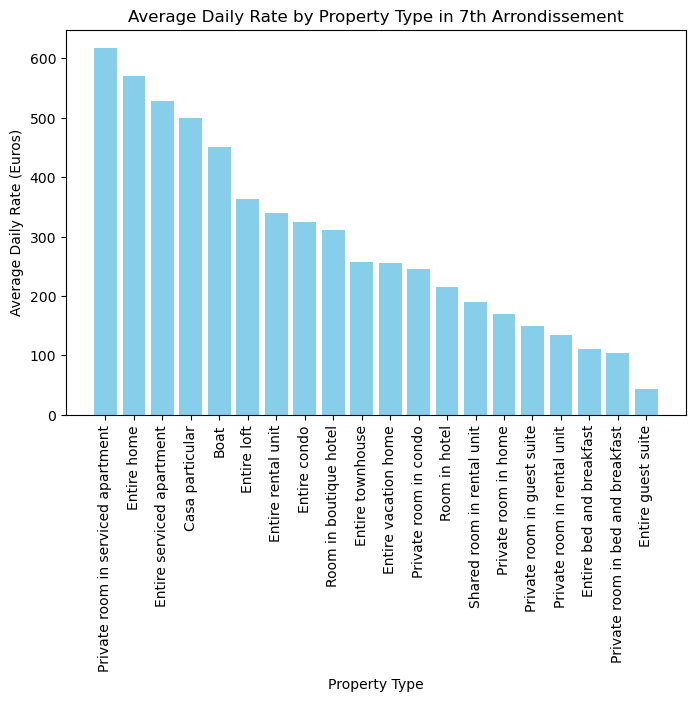

In [198]:
plt.figure(figsize =(8, 5))
plt.bar(average_daily_rate['Property Type'], average_daily_rate['Average Daily Rate'], color = 'skyblue')
plt.xlabel('Property Type')
plt.ylabel('Average Daily Rate (Euros)')
plt.title('Average Daily Rate by Property Type in 7th Arrondissement')
plt.xticks(rotation=90)
plt.show()

In [201]:
average_daily_rate_bedrooms = listing.groupby(['property_type', 'bedrooms'])['price'].mean().reset_index()
average_daily_rate_bedrooms.columns = ['Property Type' , 'Bedrooms', 'Average Daily Rate']


In [202]:
average_daily_rate_bedrooms

,Property Type,Bedrooms,Average Daily Rate
0,Boat,2.0,450.000000
1,Casa particular,1.0,500.000000
2,Entire bed and breakfast,1.0,110.000000
3,Entire condo,0.0,114.666667
4,Entire condo,1.0,238.772727
5,Entire condo,2.0,273.000000
6,Entire condo,3.0,1650.000000
7,Entire condo,4.0,400.000000
8,Entire guest suite,0.0,43.000000
9,Entire home,1.0,139.333333


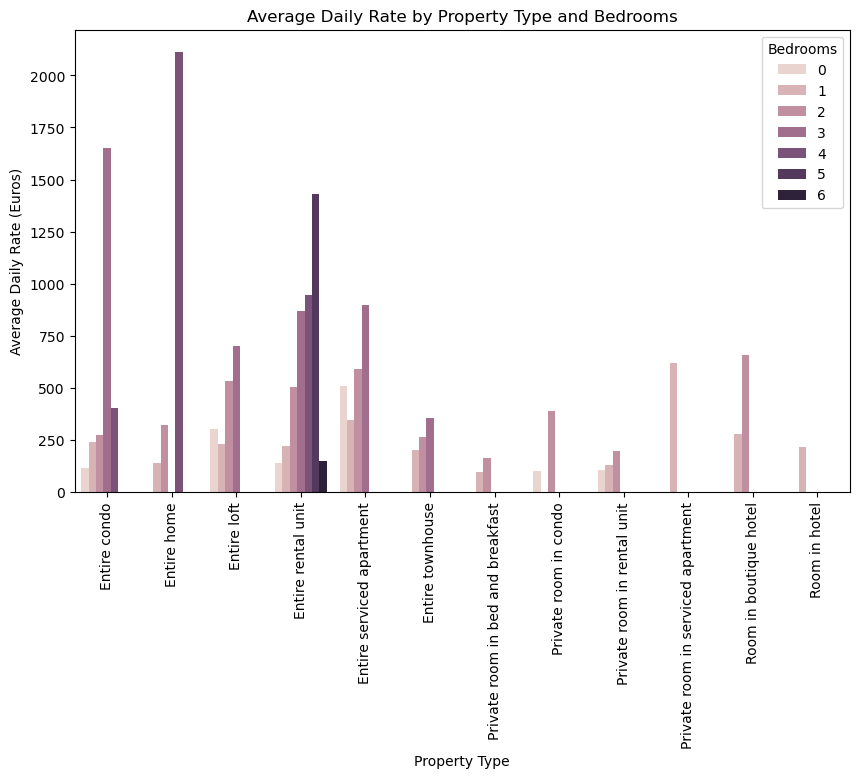

In [159]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Property Type', y = 'Average Daily Rate', hue = 'Bedrooms', data = average_daily_rate_bedrooms)

plt.xlabel('Property Type')
plt.ylabel('Average Daily Rate (Euros)')
plt.title ('Average Daily Rate by Property Type and Bedrooms')
plt.legend(title = 'Bedrooms')
plt.xticks(rotation=90)

plt.show()

In [187]:
average_daily_rate_bathrooms = listing.groupby(['property_type', 'bathrooms'])['price'].mean().reset_index()
average_daily_rate_bathrooms.columns = ['Property Type' , 'Bathrooms', 'Average Daily Rate']

In [188]:
average_daily_rate_bathrooms

,Property Type,Bathrooms,Average Daily Rate
0,Boat,1.0,450.000000
1,Casa particular,1.0,500.000000
2,Entire bed and breakfast,1.0,110.000000
3,Entire condo,1.0,217.916667
4,Entire condo,1.5,352.500000
5,Entire condo,2.0,1144.000000
6,Entire condo,2.5,317.000000
7,Entire guest suite,1.0,43.000000
8,Entire home,1.0,139.000000
9,Entire home,1.5,140.000000


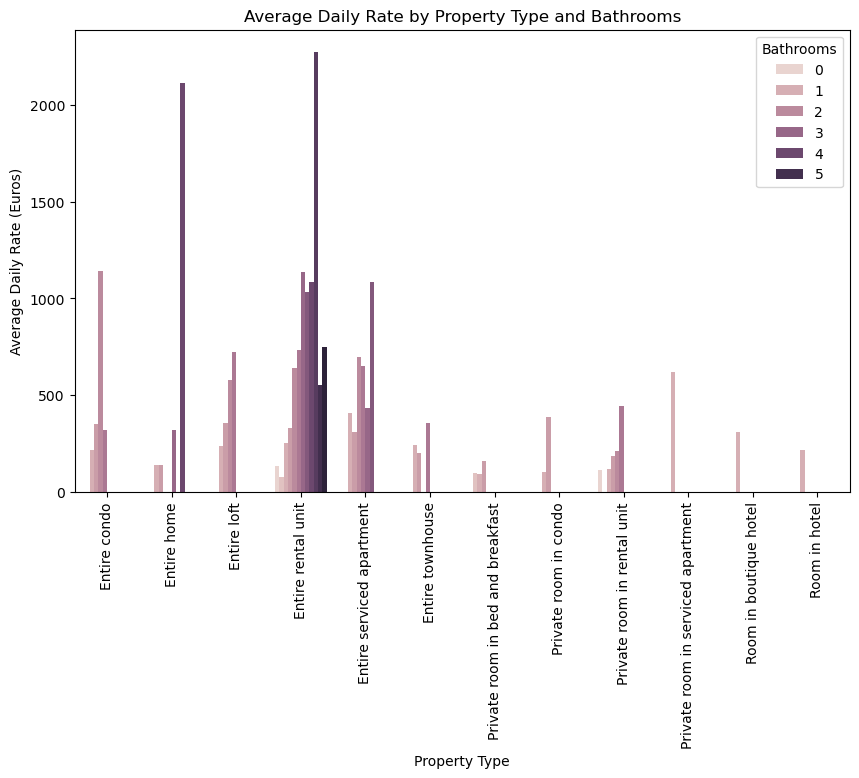

In [162]:
plt.figure(figsize=(10, 6))
sns.barplot(x = 'Property Type', y = 'Average Daily Rate', hue = 'Bathrooms', data = average_daily_rate_bathrooms)

plt.xlabel('Property Type')
plt.ylabel('Average Daily Rate (Euros)')
plt.title ('Average Daily Rate by Property Type and Bathrooms')
plt.legend(title = 'Bathrooms')
plt.xticks(rotation=90)

plt.show()

In [189]:
grouped = average_daily_rate_bathrooms.groupby(['Bathrooms']).agg({'Average Daily Rate' : 'mean'}).reset_index()
grouped

,Bathrooms,Average Daily Rate
0,0.0,123.300000
1,0.5,85.166667
2,1.0,242.944006
3,1.5,260.433732
4,2.0,653.600000
5,2.5,537.412500
6,3.0,630.433333
7,3.5,1057.944444
8,4.0,1599.400000
9,4.5,2277.000000


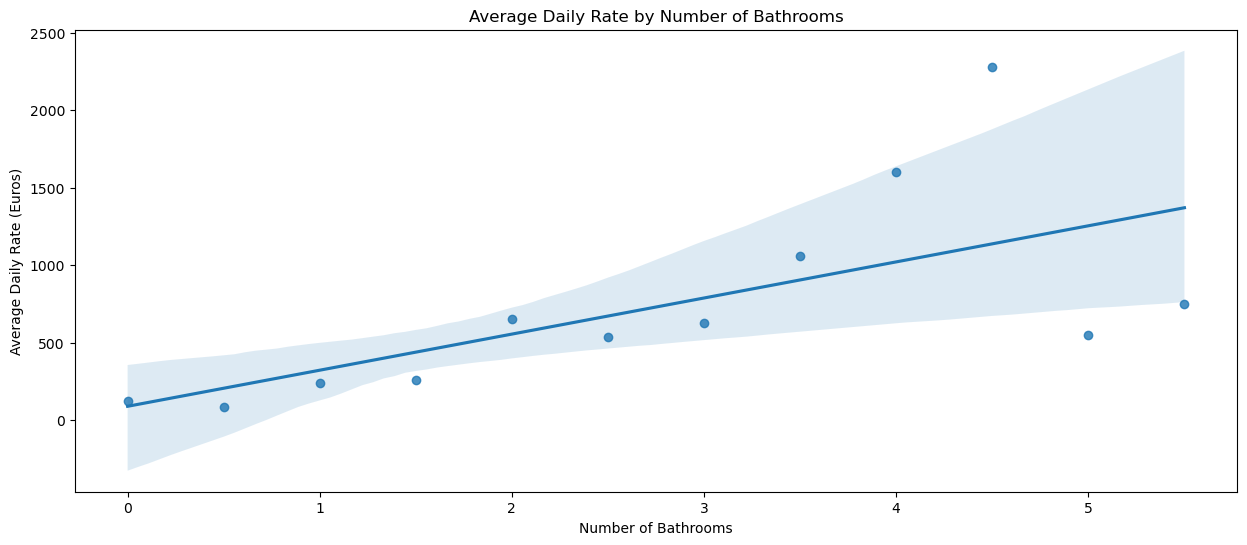

In [191]:
plt.figure(figsize=(15, 6))

sns.regplot(data = grouped, x = 'Bathrooms', y = 'Average Daily Rate', scatter = True)

plt.title('Average Daily Rate by Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Average Daily Rate (Euros)')

plt.show()

In [194]:
grouped_bedrooms = average_daily_rate_bedrooms.groupby(['Bedrooms']).agg({'Average Daily Rate' : 'mean'}).reset_index()
grouped_bedrooms

,Bedrooms,Average Daily Rate
0,0.0,186.424582
1,1.0,239.924682
2,2.0,394.116014
3,3.0,893.954167
4,4.0,1153.743590
5,5.0,1430.750000
6,6.0,150.000000


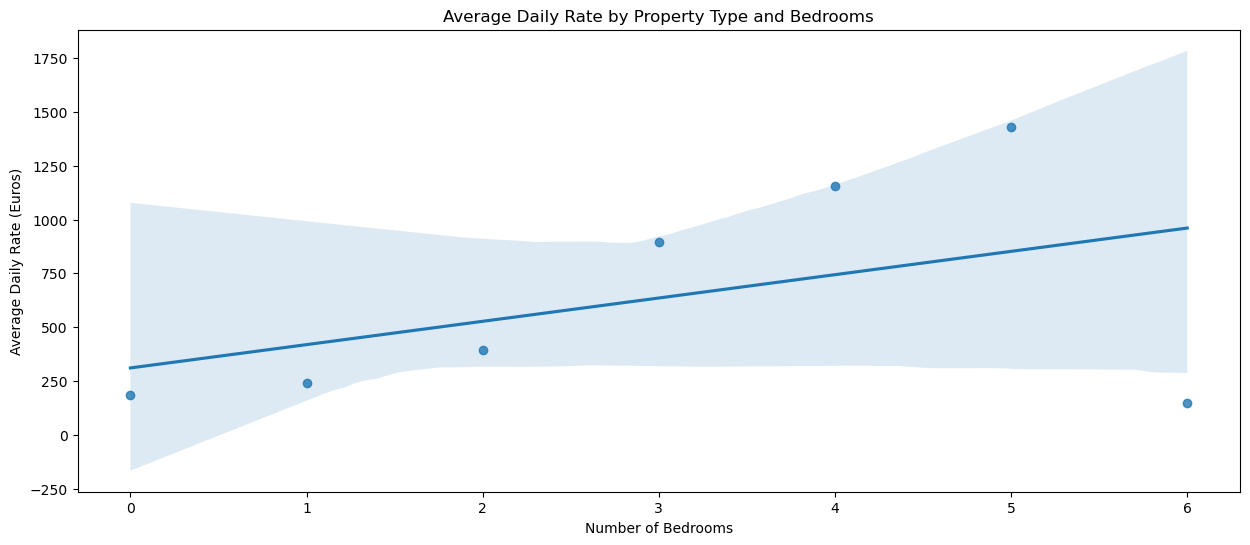

In [195]:
plt.figure(figsize=(15, 6))

sns.regplot(data = grouped_bedrooms, x = 'Bedrooms', y = 'Average Daily Rate', scatter = True)

plt.title('Average Daily Rate by Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Average Daily Rate (Euros)')

plt.show()

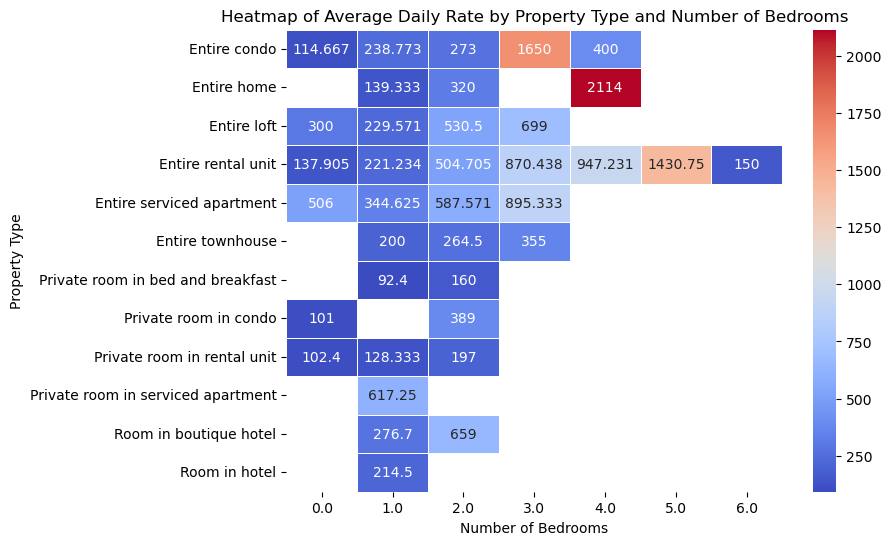

In [179]:
heatmap_data = average_daily_rate_bedrooms.pivot_table(values = 'Average Daily Rate', 
                                                       index = 'Property Type', 
                                                       columns = 'Bedrooms')

plt.figure(figsize=(8, 6))
sns.heatmap(heatmap_data, annot = True, cmap = 'coolwarm', linewidths=0.5, fmt = 'g')
plt.title('Heatmap of Average Daily Rate by Property Type and Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Property Type')


plt.show()

In [211]:
one_bed_one_bath = listing[(listing['bedrooms'] == 1) & (listing['bathrooms'] == 1)]


In [212]:
one_bed_one_bath

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f
101,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f
264,484126,Apartment with terrace Paris 07,2396369,2012-05-17,"Paris, France",no_data,no_data,Palais-Bourbon,48.852780,2.318740,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,2.0,"[""Room-darkening shades"", ""Cooking basics"", ""E...",486.0,3,60,29,4.96,5.00,4.97,4.97,4.97,4.97,4.79,f
299,497821,"CHAMPS DE MARS, BRETEUIL, CHARMING FLAT 58 m2",2457817,2012-05-24,"Paris, France",within a few hours,100%,Palais-Bourbon,48.852590,2.312880,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,2.0,"[""Cooking basics"", ""Elevator"", ""Long term stay...",250.0,3,1125,110,4.54,4.57,4.15,4.75,4.68,4.89,4.47,f
447,566668,COSY & CHIC STUDIO SEVRES BABYLONE/ST GERMAIN,3015724,2012-07-22,"Paris, France",within an hour,100%,Palais-Bourbon,48.850280,2.317190,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""L...",180.0,3,90,88,4.88,4.93,4.98,4.97,4.91,4.87,4.79,t
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94724,1222246732366936452,A Fancy 1-BR with Services on the Champ-de-Mars,572796284,2024-04-17,no_location,within an hour,100%,Palais-Bourbon,48.857387,2.301658,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Pack \u2019n play/Travel crib - always at th...",263.0,2,1125,1,5.00,5.00,5.00,5.00,4.00,5.00,5.00,t
94846,1223076806224850492,a 2 pas de la tour Eiffel.,511505443,2023-04-24,"Paris, France",within an hour,100%,Palais-Bourbon,48.860569,2.309249,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Kitchen"", ""Bed linens"", ""D...",225.0,2,365,1,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t
95000,1228200111947679995,"1579: Eiffel Tower Gem, Stylish & Unique",464019948,2022-06-13,"Paris, France",no_data,no_data,Palais-Bourbon,48.856760,2.301990,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Cooking basics"", ""Dedicated workspac...",184.0,2,22,1,4.00,4.00,5.00,5.00,5.00,5.00,5.00,t
95064,1228867541766808279,Appartement prestige proche Tour Eiffel -par L...,532452446,2023-08-17,no_location,within a few hours,100%,Palais-Bourbon,48.859614,2.308261,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""Smoke alar...",171.0,2,365,2,5.00,5.00,5.00,5.00,5.00,5.00,5.00,t


In [219]:
grouped_one_bed_one_bath = one_bed_one_bath.groupby(['property_type']).agg({'price' : 'mean'}).reset_index().sort_values(by=['price'], ascending=False)
grouped_one_bed_one_bath

,property_type,price
12,Private room in serviced apartment,617.250000
0,Casa particular,500.000000
6,Entire serviced apartment,345.200000
13,Room in boutique hotel,276.700000
4,Entire loft,229.571429
5,Entire rental unit,220.007987
14,Room in hotel,214.500000
2,Entire condo,213.500000
7,Entire townhouse,200.000000
10,Private room in home,170.000000


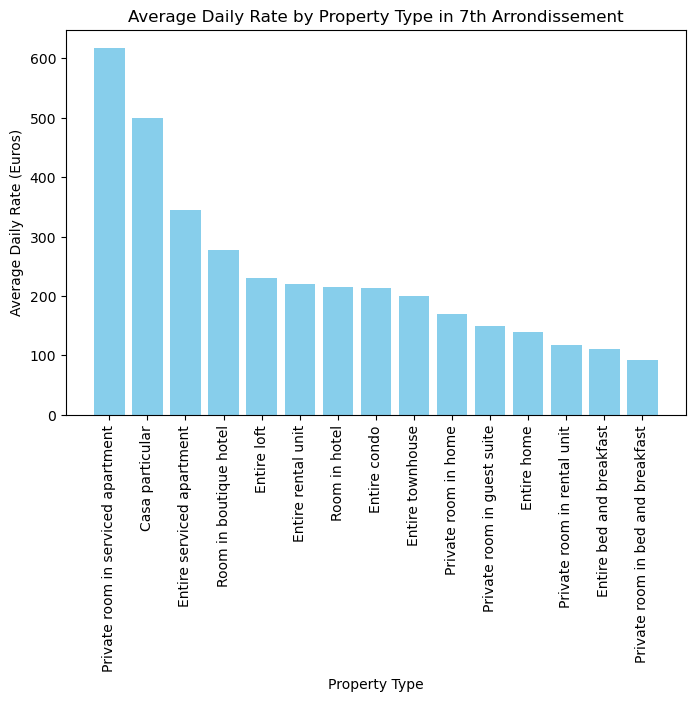

In [220]:
plt.figure(figsize =(8, 5))
plt.bar(grouped_one_bed_one_bath['property_type'], grouped_one_bed_one_bath['price'], color = 'skyblue')
plt.xlabel('Property Type')
plt.ylabel('Average Daily Rate (Euros)')
plt.title('Average Daily Rate by Property Type in 7th Arrondissement')
plt.xticks(rotation=90)
plt.show()

In [223]:
review_listing = pd.read_csv('../datasets/reviews and listing for 7th Arrondissement.csv', index_col=0)
review_listing

,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,listing_id,date,comments
0,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.6,4.57,4.75,4.81,4.74,4.91,4.55,f,3.321000e+04,2010-07-13,"Tres bien! This flat is fantastic, nice quiet ..."
1,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.6,4.57,4.75,4.81,4.74,4.91,4.55,f,3.321000e+04,2014-12-11,"The flat was lovely, the location was unreal! ..."
2,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.6,4.57,4.75,4.81,4.74,4.91,4.55,f,3.321000e+04,2015-01-22,First of all thank you to Karen as we booked t...
3,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.6,4.57,4.75,4.81,4.74,4.91,4.55,f,3.321000e+04,2015-05-17,The location of this apartment is absolutely a...
4,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.6,4.57,4.75,4.81,4.74,4.91,4.55,f,3.321000e+04,2015-06-08,We had a great 5-night stay at this apartment ...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52784,1223076806224850492,a 2 pas de la tour Eiffel.,511505443,2023-04-24,"Paris, France",within an hour,100%,Palais-Bourbon,48.860569,2.309249,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Kitchen"", ""Bed linens"", ""D...",225.0,2,365,1,5.0,5.00,5.00,5.00,5.00,5.00,5.00,t,1.223077e+18,2024-08-30,"Great location! Close to bikes, the Metro, a..."
52785,1228200111947679995,"1579: Eiffel Tower Gem, Stylish & Unique",464019948,2022-06-13,"Paris, France",no_data,no_data,Palais-Bourbon,48.856760,2.301990,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,2.0,"[""Wifi"", ""Cooking basics"", ""Dedicated workspac...",184.0,2,22,1,4.0,4.00,5.00,5.00,5.00,5.00,5.00,t,1.228200e+18,2024-09-01,Mi estadía fue muy buena. Debido a que el luga...
52786,1228867541766808279,Appartement prestige proche Tour Eiffel -par L...,532452446,2023-08-17,no_location,within a few hours,100%,Palais-Bourbon,48.859614,2.308261,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""Smoke alar...",171.0,2,365,2,5.0,5.00,5.00,5.00,5.00,5.00,5.00,t,1.228868e+18,2024-08-25,Merci beaucoup Zinelabidine pour votre accueil...
52787,1228867541766808279,Appartement prestige proche Tour Eiffel -par L...,532452446,2023-08-17,no_location,within a few hours,100%,Palais-Bourbon,48.859614,2.308261,Entire rental unit,Entire home/apt,3,1.0,1 bath,1.0,1.0,"[""Kitchen"", ""Dedicated workspace"", ""Smoke alar...",171.0,2,365,2,5.0,5.00,5.00,5.00,5.00,5.00,5.00,t,1.228868e+18,2024-08-26,Nous 

In [224]:
one_bed_one_bath_reviews = review_listing[(listing['bedrooms'] == 1) & (review_listing['bathrooms'] == 1)]
one_bed_one_bath_reviews

C:\Users\AbbyParker\AppData\Local\Temp\ipykernel_22648\2853857121.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  one_bed_one_bath_reviews = review_listing[(listing['bedrooms'] == 1) & (review_listing['bathrooms'] == 1)]


,id,name,host_id,host_since,host_location,host_response_time,host_response_rate,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,instant_bookable,listing_id,date,comments
84,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f,3.321000e+04,2019-04-30,"Karen’s place was perfect. Yes, it was small a..."
87,33210,PERFECT LOCATION! GREAT RATES! BEST,76961,2010-02-03,"Paris, France",a few days or more,10%,Palais-Bourbon,48.856520,2.327960,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Long term stays allowed"", ...",76.0,30,360,90,4.60,4.57,4.75,4.81,4.74,4.91,4.55,f,3.321000e+04,2019-05-30,O apartamento vale pela localização. A cama é...
971,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f,1.519350e+05,2012-04-17,Staying at Nicolas apartment was great. Locati...
1025,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f,1.519350e+05,2015-11-18,Kevin's apartment is great! Very centrally lo...
1204,151935,Lovely Apt in Heart of Paris: 10min Walk to Lo...,731088,2011-06-22,France,within an hour,100%,Palais-Bourbon,48.854095,2.328356,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Room-darkening shades"", ""Cooking basics"", ""S...",125.0,2,30,238,4.74,4.74,4.72,4.84,4.96,4.96,4.68,f,1.519350e+05,2024-08-18,Abbiamo soggiornato io e mia nipote Roberta da...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52527,1177455947228328179,(C4)Stylish Studio in the Heart of the 7th -2p...,569219369,2024-03-27,no_location,within an hour,100%,Palais-Bourbon,48.856300,2.305480,Entire rental unit,Entire home/apt,2,1.0,1 bath,0.0,1.0,"[""Wifi"", ""Cooking basics"", ""Bread maker"", ""Win...",149.0,1,365,7,5.00,5.00,5.00,5.00,5.00,5.00,4.86,t,1.177456e+18,2024-08-24,Thank you very much Diane for being an amazing...
52539,1179066170368126963,Rue du Bac Hideaway.,583495788,2024-06-14,no_location,within an hour,100%,Palais-Bourbon,48.856788,2.326836,Entire rental unit,Entire home/apt,2,1.0,1 bath,2.0,3.0,"[""Cooking basics"", ""Elevator"", ""Stove"", ""Dishe...",153.0,2,120,3,5.00,5.00,5.00,5.00,5.00,5.00,5.00,f,1.179066e+18,2024-08-22,"The house is right next to the Louvre, just a ..."
52560,1182457723035618126,T2 de charme proche de la Seine,582070908,2024-06-07,"Paris, France",within an hour,100%,Palais-Bourbon,48.858027,2.331052,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Smoke alarm"", ""Wifi"", ""Heating"", ""Indoor fir...",123.0,1,1125,3,4.00,4.67,4.33,4.67,3.00,4.67,4.00,f,1.182458e+18,2024-08-30,Great apartment at a fantastic location!
52746,1202840745601946654,Haussmann style apt with lift /near Invalides,566009350,2024-03-08,"Paris, France",within an hour,100%,Palais-Bourbon,48.846460,2.314280,Entire rental unit,Entire home/apt,4,1.0,1 bath,1.0,1.0,"[""Cooking basics"", ""Stove"", ""Dishes and silver...",122.0,1,365,10,4.70,4.90,5.00,5.00,5.00,4.90,4.80,t,1.202841e+18,2024-08-05,

In [228]:
def get_completion(prompt, model="gpt-4o-mini", temperature=0):
    """
    Sends a prompt to the specified language model and returns the model's response. 

    Parameters:

    prompt (str): The input prompt containing the task or query you want the model to respond to. 

    model (str): The identifier for the model to be used for generating the completion. 

    temperature (float): Controls the randomnness of the output.
                        A value of 0 makes the model more deterministic, returning the most probable response. 

                        
    Returns:
    str: The content of the reponse generated by the model based on the input prompt. 

    """
    messages = [{"role": "user", "content": prompt}]

    #sends a request to the model with the specified parameters
    response = client.chat.completions.create(   
        model=model,
        messages=messages,
        temperature = temperature
    )

    #returns the content of the response generated by the model
    return response.choices[0].message.content

In [231]:
sample = review_listing[['id', 'comments']].sample(n = 5, random_state=30)
sample

,id,comments
4475,2611060,De ligging van het appartement was fantastisch...
50956,1084643614658197730,"Excelente apartamento, localizado muito próxim..."
3584,1758771,"Nice and cosy place to stay, with great locati..."
19139,18495744,Très agréable et reactif
41466,609234599335906484,We just loved the apartment because it had bea...


In [230]:
def analyze_review(sample):
    """
    Analyzes a given review by extracting the listing ID, translating the comment, 
    evaluating sentiment, and identifying key positive and negative words.

    Parameters:
    -----------
    sample : str
        The review text to be analyzed. This text should include the listing ID 
        and the comment to be evaluated. It should be formatted appropriately to 
        enable accurate extraction and analysis.

    Returns:
    --------
    str
        A JSON-formatted string containing the analysis results, including:
        - Listing ID
        - Translated comment
        - Sentiment analysis (positive/negative)
        - Percentage score reflecting the sentiment
        - Key words indicating positive sentiment
        - Key words indicating negative sentiment

        """
    # Define the prompt with the input sample text
    prompt = f"""
Perform the following actions using an input with the text delimited by ''':

1 - Show the listing ID, if no listing ID is present state that there was no listing ID. 
2 - Translate the whole comment into English, if no comment is available state that there was no comment left. 
3 - Analyze the comment and evaluate how positive or negative it is based on the languaged used. State whether it is positive or negative. 
4 - Assign a percentage score between 0% and 100% where 0% means completely negative and 100% means completely positive. 
Be sure to consider the tone, word choice, and overall sentiment of the review.
If the review contains a mix of both positive and negative elements, provide a balanced score.
If there are no positive key words used, the score should be 0%. 
If there are no negative key words used, the score should be 100%. 
5 - Show me the key words which were used to decide whether the comment was positive, if there were no positive words state no positive words. 
6 - Show me the key words which were used to decide whether the comment was negative, if there were no negative words state no negative words.

Use the following format:
Listing ID: <task1>
Translation: <task 2>
Analysis of comment: <task 3>
Percentage score: <task 4>
Positive key words: <task 5>
Negative key words: <task 6>

Provide the output in a JSON format.

Text:
'''{sample}'''
    """
    
    #Call the get_completion function to obtain the analysis from the model
    return get_completion (prompt)

In [232]:
result = analyze_review(sample)
result

'```json\n[\n    {\n        "Listing ID": "2611060",\n        "Translation": "The location of the apartment was fantastic...",\n        "Analysis of comment": "Positive",\n        "Percentage score": "90%",\n        "Positive key words": ["fantastic"],\n        "Negative key words": "no negative words"\n    },\n    {\n        "Listing ID": "1084643614658197730",\n        "Translation": "Excellent apartment, located very close...",\n        "Analysis of comment": "Positive",\n        "Percentage score": "95%",\n        "Positive key words": ["excellent", "close"],\n        "Negative key words": "no negative words"\n    },\n    {\n        "Listing ID": "1758771",\n        "Translation": "Nice and cosy place to stay, with great location...",\n        "Analysis of comment": "Positive",\n        "Percentage score": "90%",\n        "Positive key words": ["nice", "cosy", "great"],\n        "Negative key words": "no negative words"\n    },\n    {\n        "Listing ID": "18495744",\n        "Tr